**Introduction**

The dataset used for this project is spam dataset from Kaggle. https://www.kaggle.com/uciml/sms-spam-collection-dataset

Objective of this project to create a model to train , test and predict the spam/ham message. The below concepts are used in this project.

**Count Vectorizer** - To Tokenize the words and to create Vocabulary
**TfIDTranfomer**  - To Build Feature Index for the words
**Naive Bayes MultiNomial Algorithm** - Classifier Model for Classifying Spam/Ham Messages.

In [25]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from math import log,sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
import pandas, numpy, textblob, string
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

**Extracting Input Data**

In [26]:
message = pd.read_csv('spam.csv',encoding='latin1')
message = message.drop(['Unnamed: 2', 'Unnamed: 3','Unnamed: 4'], axis=1)
message = message.rename(columns={"v1": "labels","v2": "message"})
#message['labels'] = message['labels'].apply(lambda x: '0' if x == 'ham' else '1')
message.head()


,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Visualizing the Messages**

**Spam Word Cloud**

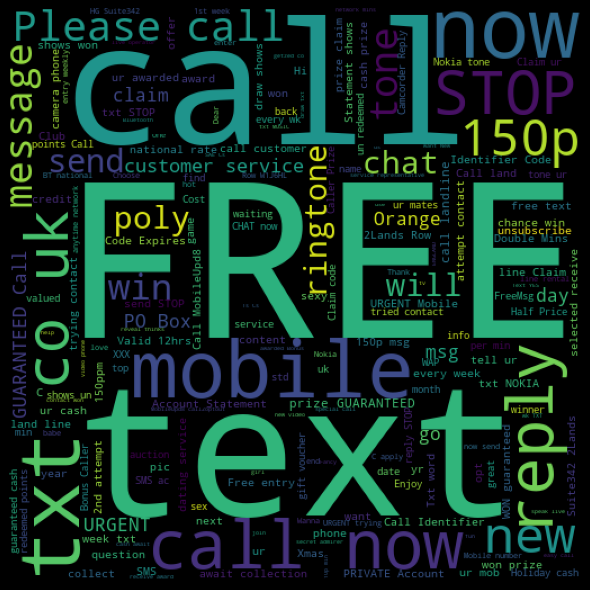

In [27]:
spam_words = ' '.join(list(message[message['labels']=='spam']['message']))
spam_wc=WordCloud(width=512,height=512).generate(spam_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Ham Word Cloud**

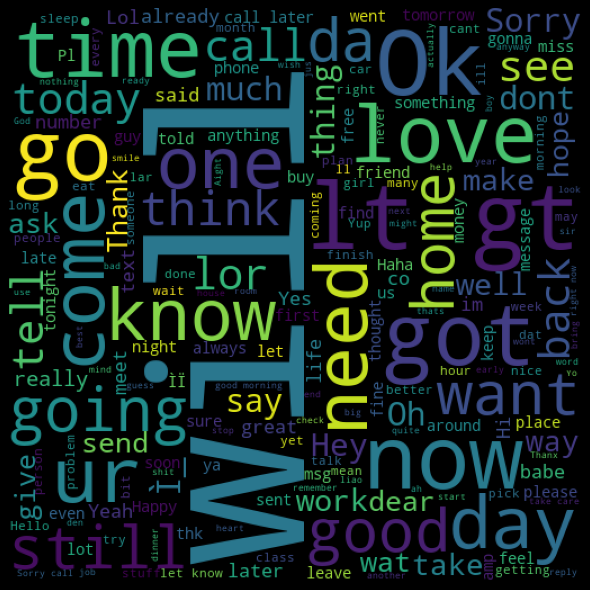

In [28]:
ham_words = ' '.join(list(message[message['labels']=='ham']['message']))
ham_wc=WordCloud(width=512,height=512).generate(ham_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(ham_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**Vectorization**

In [29]:
bow_transformer = CountVectorizer(analyzer='word').fit(message['message'])
print(len(bow_transformer.vocabulary_))
message4=message['message'][3]
bow4=bow_transformer.transform([message4])
messages_bow = bow_transformer.transform(message['message'])

8672


**TF-IDF Vectors as features**

In [30]:
tfidf_transformer=TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print(tfidf4)

  (0, 7640)	0.2391367785302699
  (0, 7024)	0.2036385029167935
  (0, 6633)	0.588532244886041
  (0, 3927)	0.48845710205212745
  (0, 2823)	0.3528609993425001
  (0, 2802)	0.3250496221664022
  (0, 1042)	0.293626081506221


In [31]:
messages_tfidf=tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 8672)


**Naive Bayes MultiNomial Model**

In [32]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,message['labels'])

**Predicted Vs Expected**

In [33]:
print('predicted:',spam_detect_model.predict(tfidf4)[0])
print('expected:',message.labels[3])

predicted: ham
expected: ham


**All Predictions**

In [34]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


**Classification Report and Confusion Matrix**

In [35]:
print(classification_report(message['labels'],all_predictions))
print(confusion_matrix(message['labels'],all_predictions))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      4825
        spam       1.00      0.82      0.90       747

    accuracy                           0.98      5572
   macro avg       0.99      0.91      0.94      5572
weighted avg       0.98      0.98      0.98      5572

[[4825    0]
 [ 132  615]]


**Training Our Model**

In [36]:
msg_train,msg_test,label_train,label_test = train_test_split(message['message'],message['labels'],test_size=0.2)
print(len(msg_train),len(msg_test),len(label_train),len(label_test))

4457 1115 4457 1115


**Data Pipeline and Prediction Reports**

In [37]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
   ( 'bow',CountVectorizer(analyzer='word')),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB()),
])

pipeline.fit(msg_train,label_train)

predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1012
        spam       0.70      1.00      0.82       103

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115



**Test for New Value**

The Process is to insert the new message using Position Id of test data and rerun the predictor to find out whether the Model is able to classify the message as Spam/Ham.

**New Spam Message and Prediction**

In [39]:
msg_test.iloc[0] = 'Free Prize Available '
print(msg_test.iloc[0])
predictions = pipeline.predict(msg_test)
print("The Message Sent is "+ predictions[0])

Free Prize Available 
The Message Sent is spam


**New Ham Message and Test Prediction**

In [40]:
msg_test.iloc[0] = "OK i'm waliking ard now... Do u wan me 2 buy anything go ur house?"
print(msg_test.iloc[0])
predictions = pipeline.predict(msg_test)
print("The Message Sent is "+ predictions[0])

OK i'm waliking ard now... Do u wan me 2 buy anything go ur house?
The Message Sent is ham


**Conclusion**

We have captured the Predictions and Classification Report for the spam database. The Metrics shows that the model is good and it is able to classify ~90% of spam messages.

Also We have tested the model by manually inserting a new value to test dataset and identified that the Prediction matches with the nature of message